In [2]:
import numpy as np
import pandas as pd
import qstock as qs
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
import pickle
import quantstats
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei']#用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False#用来正常显示负号
from scipy.stats.mstats import winsorize


In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

# 数据处理

In [14]:
code = pd.read_excel('TRD_co.xlsx')
stock_name = code.iloc[:,1]
his_data = qs.get_data(stock_name,start='20200101',end='20230130', fqt=2)
date = his_data.index
his_data['date'] = date
his_data.index=range(len(his_data))
his_data

  1%|▏         | 62/4939 [00:03<03:14, 25.07it/s] 

输入代码有误


 29%|██▊       | 1415/4939 [01:03<01:55, 30.48it/s]Exception in thread Thread-21081:
Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 185, in <lambda>
    return wraps(func)(lambda *args, **kwargs : func_timeout(defaultTimeout, func, args=args, kwargs=kwargs))
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 101, in func_timeout
    raise FunctionTimedOut('', timeout, func, args, kwargs)
func_timeout.exceptions.FunctionTimedOut: Function run (args=('广东鸿图',)) (kwargs={}) timed out after 5.000000 seconds.


 45%|████▍     | 2202/4939 [01:29<01:51, 24.53it/s]

输入代码有误


 71%|███████   | 3512/4939 [02:14<00:40, 35.49it/s]Exception in thread Thread-23165:
Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 185, in <lambda>
    return wraps(func)(lambda *args, **kwargs : func_timeout(defaultTimeout, func, args=args, kwargs=kwargs))
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 101, in func_timeout
    raise FunctionTimedOut('', timeout, func, args, kwargs)
func_timeout.exceptions.FunctionTimedOut: Function run (args=('倍加洁',)) (kwargs={}) timed out after 5.000000 seconds.


 81%|████████▏ | 4023/4939 [02:30<00:25, 35.94it/s]

输入代码有误


 84%|████████▍ | 4148/4939 [02:33<00:20, 38.47it/s]

输入代码有误


 92%|█████████▏| 4547/4939 [02:46<00:15, 24.58it/s]Exception in thread Thread-24230:
Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 185, in <lambda>
    return wraps(func)(lambda *args, **kwargs : func_timeout(defaultTimeout, func, args=args, kwargs=kwargs))
  File "D:\Anaconda\lib\site-packages\func_timeout\dafunc.py", line 101, in func_timeout
    raise FunctionTimedOut('', timeout, func, args, kwargs)
func_timeout.exceptions.FunctionTimedOut: Function run (args=('国义招标',)) (kwargs={}) timed out after 5.000000 seconds.


Exception in thread Thread-24235:
Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.

输入代码有误


100%|█████████▉| 4935/4939 [03:01<00:00, 27.26it/s]


,name,code,open,high,low,close,volume,turnover,turnover_rate,date
0,汇通能源,600605,258.86,262.22,258.86,261.74,9611,10800539.0,0.65,2020-01-02
1,汇通能源,600605,262.70,271.10,260.78,265.82,15782,18075839.0,1.07,2020-01-03
2,汇通能源,600605,264.86,273.50,264.38,273.02,21277,24727319.0,1.44,2020-01-06
3,汇通能源,600605,273.02,275.42,271.34,273.74,12290,14428468.0,0.83,2020-01-07
4,汇通能源,600605,273.50,274.70,267.26,269.66,17109,19907842.0,1.16,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
3163009,麒麟信安,688152,188.88,191.23,187.00,188.80,2906,54826342.0,2.54,2023-01-17
3163010,麒麟信安,688152,189.93,194.88,186.11,193.80,5201,99690083.0,4.54,2023-01-18
3163011,麒麟信安,688152,191.99,201.00,191.00,199.50,7300,143811525.0,6.37,2023-01-19
3163012,麒麟信安,688152,198.50,212.00,197.10,205.60,10724,220368424.0,9.36,2023-01-20


## 去除异常股票（ST，*ST等）

In [15]:
# st and *ST
st_df = his_data[his_data.name.str.contains('ST')]
sts = st_df['name'].values.tolist() 
sts = list(set(sts))
for st in sts:
    his_data = his_data.drop(index=(his_data.loc[(his_data['name'] == st)].index))

## 最少交易日

个股交易日超过总时间窗口的三分之二才参与计算

In [20]:
his_data.loc[~his_data.name.isin(drop_index)]

,name,code,open,high,low,close,volume,turnover,turnover_rate,date
0,汇通能源,600605,258.86,262.22,258.86,261.74,9611,10800539.00,0.65,2020-01-02
1,汇通能源,600605,262.70,271.10,260.78,265.82,15782,18075839.00,1.07,2020-01-03
2,汇通能源,600605,264.86,273.50,264.38,273.02,21277,24727319.00,1.44,2020-01-06
3,汇通能源,600605,273.02,275.42,271.34,273.74,12290,14428468.00,0.83,2020-01-07
4,汇通能源,600605,273.50,274.70,267.26,269.66,17109,19907842.00,1.16,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
3162948,华岭股份,430139,54.20,54.74,53.66,54.20,2993,2898619.28,0.23,2023-01-17
3162949,华岭股份,430139,54.20,54.20,53.82,54.15,1136,1097562.70,0.09,2023-01-18
3162950,华岭股份,430139,54.20,54.42,53.93,54.09,1794,1737314.26,0.14,2023-01-19
3162951,华岭股份,430139,54.20,54.63,54.15,54.47,2733,2657901.25,0.21,2023-01-20


In [21]:
date = list(set(his_data['date'].tolist()))
benchmark = len(date)*(2/3)
temp = his_data.groupby('name')['date'].count()
drop_index = temp[temp<benchmark].index
his_data = his_data.loc[~his_data.name.isin(drop_index)]
his_data['return'] = his_data['close'].pct_change()
his_data = his_data.dropna()
his_data

,name,code,open,high,low,close,volume,turnover,turnover_rate,date,return
1,汇通能源,600605,262.70,271.10,260.78,265.82,15782,18075839.00,1.07,2020-01-03,0.015588
2,汇通能源,600605,264.86,273.50,264.38,273.02,21277,24727319.00,1.44,2020-01-06,0.027086
3,汇通能源,600605,273.02,275.42,271.34,273.74,12290,14428468.00,0.83,2020-01-07,0.002637
4,汇通能源,600605,273.50,274.70,267.26,269.66,17109,19907842.00,1.16,2020-01-08,-0.014905
5,汇通能源,600605,273.26,274.46,269.66,270.62,10506,12272458.00,0.71,2020-01-09,0.003560
...,...,...,...,...,...,...,...,...,...,...,...
3162948,华岭股份,430139,54.20,54.74,53.66,54.20,2993,2898619.28,0.23,2023-01-17,0.000000
3162949,华岭股份,430139,54.20,54.20,53.82,54.15,1136,1097562.70,0.09,2023-01-18,-0.000923
3162950,华岭股份,430139,54.20,54.42,53.93,54.09,1794,1737314.26,0.14,2023-01-19,-0.001108
3162951,华岭股份,430139,54.20,54.63,54.15,54.47,2733,2657901.25,0.21,2023-01-20,0.007025


In [23]:
his_data.to_csv('A股历史数据',encoding = 'utf_8_sig')

## 统计A股公司数量时间趋势变化

<AxesSubplot:xlabel='date'>

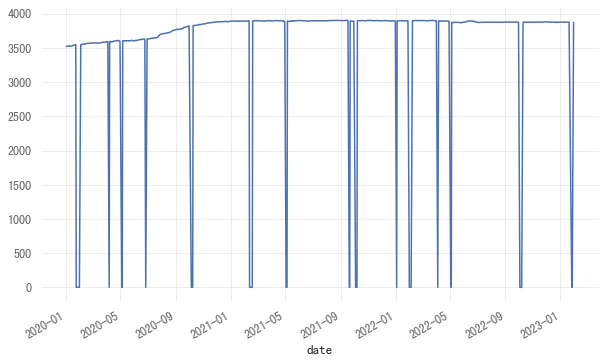

In [10]:
stock_num = his_data.groupby('date')['name'].count()
stock_num.plot(figsize=(10,6))

A股公司数量在2020-2021年不断增加，超过3950家。在2022年5月少许回落，目前在3900家左右

疫情期间A股上市企业增加了大约400家

# 沪深300

In [195]:
mkt_return = qs.get_data('沪深300',start='20200101',end='20230130',fqt=2)
mkt_return['return'] = mkt_return['close'].pct_change()
mkt_return.dropna()
mkt_return

100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


,name,code,open,high,low,close,volume,turnover,turnover_rate,return
date,,,,,,,,,,
2020-01-02,沪深300,000300,4121.35,4172.66,4121.35,4152.24,182116772,2.701055e+11,0.63,NaN
2020-01-03,沪深300,000300,4161.22,4164.30,4131.86,4144.96,142826245,2.152163e+11,0.49,-0.001753
2020-01-06,沪深300,000300,4120.52,4170.64,4102.38,4129.30,175309952,2.501821e+11,0.61,-0.003778
2020-01-07,沪深300,000300,4137.40,4161.25,4135.10,4160.23,139489032,1.963891e+11,0.48,0.007490
2020-01-08,沪深300,000300,4139.63,4149.81,4101.98,4112.32,167585851,2.124063e+11,0.58,-0.011516
...,...,...,...,...,...,...,...,...,...,...
2023-01-17,沪深300,000300,4138.84,4148.58,4118.16,4137.24,95479040,2.043816e+11,0.33,-0.000174
2023-01-18,沪深300,000300,4140.10,4151.46,4125.77,4130.31,84200645,1.721262e+11,0.29,-0.001675
2023-01-19,沪深300,000300,4125.58,4156.01,4105.98,4156.01,94608398,1.926996e+11,0.33,0.006222


# 无风险收益

本例中无风险利率参考锐思数据的计算方式，2006年之后用上海银行三个月同业拆借利率作为无风险利率

而了解无风险利率最简便快捷的方式，就是看当前的同业拆借利率。在普通的拆借交易中，大银行基本上不会有违约的风险，而且同业拆借市场资金量大，流动性好，随时都能够有交易，不会出现有价无市的情况。所以（除开国债之外），同业拆借大概是最接近无风险的交易，而拆借的利率也就是最方便的模拟无风险利率的一个指标。有了这个指标，很多金融产品才能够定价，顺利的完成交易。

作者：Luo Patrick
链接：https://www.zhihu.com/question/20078836/answer/13902696
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [157]:
rf = qs.ib_rate()
rf

,报告日,隔夜,1周,2周,1月,3月,6月,9月,1年
0,2006-10-08,2.1184,2.2930,2.3848,2.5319,2.6110,2.7404,2.8521,2.9543
1,2006-10-09,2.0990,2.2960,2.3972,2.5522,2.6248,2.7431,2.8514,2.9549
2,2006-10-10,2.0922,2.2971,2.4236,2.5739,2.6325,2.7454,2.8544,2.9531
3,2006-10-11,2.0955,2.2932,2.4930,2.5864,2.6338,2.7475,2.8547,2.9559
4,2006-10-12,2.0943,2.2904,2.5240,2.5900,2.6380,2.7470,2.8570,2.9550
...,...,...,...,...,...,...,...,...,...
4070,2023-01-19,1.6560,2.2810,2.7570,2.2910,2.3760,2.4720,2.5340,2.5840
4071,2023-01-20,1.8340,1.9880,2.2930,2.2940,2.3770,2.4720,2.5350,2.5830
4072,2023-01-28,1.4320,1.9150,1.9100,2.2720,2.3730,2.4670,2.5350,2.5810
4073,2023-01-29,1.2020,1.8540,1.9300,2.2640,2.3670,2.4660,2.5320,2.5770


输入datetime64格式的时间：直接输'年-月-日'

按照日期选择数据的方法：rf.loc[rf['报告日']>'2020-01-01']

In [211]:
rf.to_csv('无风险利率',encoding = 'utf_8_sig')

# 构建市场因子

In [196]:
data = pd.concat([mkt_return['return'],rf['3月']],axis=1,join='inner')
data['mkt_fac'] = data['return'] - data['3月']
data.to_csv('市场超额收益',encoding = 'utf_8_sig')
data

,return,3月,mkt_fac
2020-01-02,NaN,2.994,NaN
2020-01-03,-0.001753,2.960,-2.961753
2020-01-06,-0.003778,2.920,-2.923778
2020-01-07,0.007490,2.899,-2.891510
2020-01-08,-0.011516,2.881,-2.892516
...,...,...,...
2023-01-17,-0.000174,2.366,-2.366174
2023-01-18,-0.001675,2.374,-2.375675
2023-01-19,0.006222,2.376,-2.369778
2023-01-20,0.006141,2.377,-2.370859


In [25]:
mkt_fac = data['return'] - data['3月']

# 市场因子实证

In [258]:
his_data = pd.read_csv('A股历史数据')
his_data

,Unnamed: 0,name,code,open,high,low,close,volume,turnover,turnover_rate,date,return
0,620,兆驰股份,2429,31.54,33.06,31.29,32.97,1004415,3.707365e+08,2.23,2020-01-06,0.031602
1,621,兆驰股份,2429,32.80,32.97,32.04,32.55,684406,2.518530e+08,1.52,2020-01-07,-0.012739
2,622,兆驰股份,2429,32.21,33.14,32.04,32.13,779367,2.879960e+08,1.73,2020-01-08,-0.012903
3,623,兆驰股份,2429,32.38,32.72,31.79,32.13,545712,1.996563e+08,1.21,2020-01-09,0.000000
4,624,兆驰股份,2429,32.30,32.47,31.54,31.71,434477,1.575162e+08,0.97,2020-01-10,-0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...
2877317,3209539,藏格矿业,408,220.73,222.69,219.40,220.89,70805,1.922626e+08,0.45,2023-01-17,0.006058
2877318,3209540,藏格矿业,408,219.87,222.77,219.16,220.89,68976,1.874570e+08,0.44,2023-01-18,0.000000
2877319,3209541,藏格矿业,408,221.04,221.83,219.16,221.20,76356,2.067610e+08,0.48,2023-01-19,0.001403
2877320,3209542,藏格矿业,408,221.20,228.64,221.04,227.70,124067,3.436976e+08,0.79,2023-01-20,0.029385


In [259]:
his_data['date'] = pd.to_datetime(his_data['date'])
his_data = his_data.set_index(his_data['date'])
his_data.to_csv('A股历史数据',encoding = 'utf_8_sig')
his_data

,Unnamed: 0,name,code,open,high,low,close,volume,turnover,turnover_rate,date,return
date,,,,,,,,,,,,
2020-01-06,620,兆驰股份,2429,31.54,33.06,31.29,32.97,1004415,3.707365e+08,2.23,2020-01-06,0.031602
2020-01-07,621,兆驰股份,2429,32.80,32.97,32.04,32.55,684406,2.518530e+08,1.52,2020-01-07,-0.012739
2020-01-08,622,兆驰股份,2429,32.21,33.14,32.04,32.13,779367,2.879960e+08,1.73,2020-01-08,-0.012903
2020-01-09,623,兆驰股份,2429,32.38,32.72,31.79,32.13,545712,1.996563e+08,1.21,2020-01-09,0.000000
2020-01-10,624,兆驰股份,2429,32.30,32.47,31.54,31.71,434477,1.575162e+08,0.97,2020-01-10,-0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17,3209539,藏格矿业,408,220.73,222.69,219.40,220.89,70805,1.922626e+08,0.45,2023-01-17,0.006058
2023-01-18,3209540,藏格矿业,408,219.87,222.77,219.16,220.89,68976,1.874570e+08,0.44,2023-01-18,0.000000
2023-01-19,3209541,藏格矿业,408,221.04,221.83,219.16,221.20,76356,2.067610e+08,0.48,2023-01-19,0.001403


In [194]:
rf = pd.read_csv('无风险利率')
rf['报告日'] = pd.to_datetime(rf['报告日'])
rf=rf.loc[rf['报告日']>'2020-01-01']
rf = rf.set_index('报告日')
rf.to_csv('无风险利率',encoding = 'utf_8_sig')
rf

,隔夜,1周,2周,1月,3月,6月,9月,1年
报告日,,,,,,,,
2020-01-02,1.4436,2.433,2.334,2.8975,2.994,3.019,3.052,3.086
2020-01-03,1.1620,2.349,2.190,2.8420,2.960,2.995,3.028,3.071
2020-01-06,1.0030,2.219,2.091,2.7470,2.920,2.960,3.005,3.050
2020-01-07,1.2150,2.259,2.176,2.7000,2.899,2.943,2.992,3.040
2020-01-08,1.5530,2.320,2.160,2.6380,2.881,2.930,2.983,3.032
...,...,...,...,...,...,...,...,...
2023-01-19,1.6560,2.281,2.757,2.2910,2.376,2.472,2.534,2.584
2023-01-20,1.8340,1.988,2.293,2.2940,2.377,2.472,2.535,2.583
2023-01-28,1.4320,1.915,1.910,2.2720,2.373,2.467,2.535,2.581


In [364]:
data = pd.concat([mkt_return['return'],rf['3月']/100],axis=1,join='inner')
data['mkt_fac'] = data['return'] - data['3月']
data.to_csv('市场超额收益',encoding = 'utf_8_sig')
data

,return,3月,mkt_fac
2020-01-02,NaN,0.02994,NaN
2020-01-03,-0.001753,0.02960,-0.031353
2020-01-06,-0.003778,0.02920,-0.032978
2020-01-07,0.007490,0.02899,-0.021500
2020-01-08,-0.011516,0.02881,-0.040326
...,...,...,...
2023-01-17,-0.000174,0.02366,-0.023834
2023-01-18,-0.001675,0.02374,-0.025415
2023-01-19,0.006222,0.02376,-0.017538
2023-01-20,0.006141,0.02377,-0.017629


# 个股超额收益率（R-Rf）与市场因子时序回归

In [2]:
# 初始化历史数据
his_data = pd.read_csv('A股历史数据')
his_data['date'] = pd.to_datetime(his_data['date'])
his_data = his_data.set_index(his_data.date)
his_data

,date,Unnamed: 0,name,code,open,high,low,close,volume,turnover,turnover_rate,date.1,return
date,,,,,,,,,,,,,
2020-01-06,2020-01-06,620,兆驰股份,2429,31.54,33.06,31.29,32.97,1004415,3.707365e+08,2.23,2020-01-06,0.031602
2020-01-07,2020-01-07,621,兆驰股份,2429,32.80,32.97,32.04,32.55,684406,2.518530e+08,1.52,2020-01-07,-0.012739
2020-01-08,2020-01-08,622,兆驰股份,2429,32.21,33.14,32.04,32.13,779367,2.879960e+08,1.73,2020-01-08,-0.012903
2020-01-09,2020-01-09,623,兆驰股份,2429,32.38,32.72,31.79,32.13,545712,1.996563e+08,1.21,2020-01-09,0.000000
2020-01-10,2020-01-10,624,兆驰股份,2429,32.30,32.47,31.54,31.71,434477,1.575162e+08,0.97,2020-01-10,-0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17,2023-01-17,3209539,藏格矿业,408,220.73,222.69,219.40,220.89,70805,1.922626e+08,0.45,2023-01-17,0.006058
2023-01-18,2023-01-18,3209540,藏格矿业,408,219.87,222.77,219.16,220.89,68976,1.874570e+08,0.44,2023-01-18,0.000000
2023-01-19,2023-01-19,3209541,藏格矿业,408,221.04,221.83,219.16,221.20,76356,2.067610e+08,0.48,2023-01-19,0.001403


In [3]:
# 初始化市场收益数据
data = pd.read_csv('市场超额收益')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index(data['Unnamed: 0'])
data

,Unnamed: 0,return,3月,mkt_fac
Unnamed: 0,,,,
2020-01-02,2020-01-02,NaN,0.02994,NaN
2020-01-03,2020-01-03,-0.001753,0.02960,-0.031353
2020-01-06,2020-01-06,-0.003778,0.02920,-0.032978
2020-01-07,2020-01-07,0.007490,0.02899,-0.021500
2020-01-08,2020-01-08,-0.011516,0.02881,-0.040326
...,...,...,...,...
2023-01-17,2023-01-17,-0.000174,0.02366,-0.023834
2023-01-18,2023-01-18,-0.001675,0.02374,-0.025415
2023-01-19,2023-01-19,0.006222,0.02376,-0.017538


In [4]:
from statsmodels.api import OLS
stock_name = list(set(his_data.name))
x = pd.DataFrame(data['mkt_fac'])
results = []
for stock in stock_name:
    y = pd.DataFrame(his_data.loc[his_data.name==stock]['return'])
    panel = pd.concat([x,y],axis=1,join = 'inner')
    panel = panel.dropna(axis=0)
    result = OLS(panel['return'],panel['mkt_fac']).fit(cov_type='HC0')
    results.append(result)

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1653: RuntimeWarning: invalid value encountered in subtract
  self.params, self.model.wexog)


# 求出回归R方并描述性统计

In [6]:
rsquares = []
for result in results:
    rsquare = result.rsquared
    rsquares.append(rsquare)
rsquares = pd.DataFrame(rsquares)
rsquares.describe()

,0
count,3.963000e+03
mean,2.386504e-02
std,1.780532e-02
min,2.086331e-12
25%,1.131153e-02
50%,2.025517e-02
75%,3.165814e-02
max,1.336806e-01


R方很低，说明疫情背景下单一市场因子与个股收益相关性很弱，市场因子对个股收益的影响不强

存在的问题：很严重的遗漏变量偏差

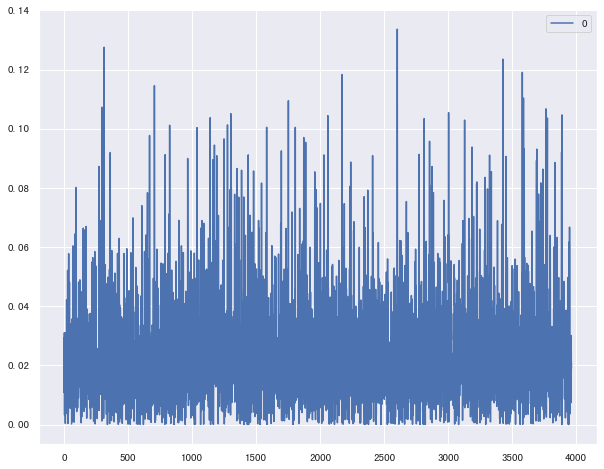

In [8]:
rsquares.plot(figsize=(10,8))

# 把回归beta按照大小排序分组

In [7]:
beta_list = []
for result in results:
    beta = result.params
    beta_list.append(beta)
beta_list = pd.DataFrame(beta_list)
beta_list = beta_list.rename(columns = {0:'Beta'})
bugIndex = beta_list[beta_list.mkt_fac==min(beta_list.mkt_fac)].index
beta_list = beta_list.drop(bugIndex)
beta_list.describe()

,mkt_fac
count,3963.000000
mean,0.145020
std,0.139613
min,-2.624001
25%,0.116982
50%,0.147904
75%,0.184479
max,5.324460


In [83]:
stock_name = list(set(his_data.name))
stock_name = pd.DataFrame(stock_name)
stock_name = stock_name.rename(columns={0:'Name'})
stock_name = stock_name.drop(bugIndex)

beta = pd.concat([stock_name, beta_list],axis=1,join='inner')
beta = beta.rename(columns={'mkt_fac':'Beta'})
stock_name

,Name
0,甘源食品
1,立中集团
2,洪汇新材
3,灵康药业
4,美力科技
...,...
3960,德创环保
3961,永太科技
3962,杭叉集团
3963,中信建投


In [9]:
# 一维排序方法，可以总结为函数
quant = np.arange(0.1,1.1,0.1)
quant_list = []
for i in quant:
    temp = beta['Beta'].quantile(q=i)
    quant_list.append(temp)
beta_ports = []

for i in range(1,11):
    if i==1:
        beta_port = beta.loc[beta.Beta<=quant_list[i-1]]['Beta']
        beta_ports.append(beta_port)
    else:
        temp = beta.loc[beta.Beta>=quant_list[i-2]]
        beta_port = temp.loc[temp.Beta<=quant_list[i-1]]['Beta']
        beta_ports.append(beta_port)
beta_ports = np.array(beta_ports)
beta_ports

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([8       0.083410
       12      0.043722
       20      0.074566
       36      0.072850
       65      0.077347
                 ...
       3912    0.084349
       3921    0.070952
       3927    0.054706
       3928    0.068589
       3960    0.058824
       Name: Beta, Length: 397, dtype: float64,
       3       0.085822
       10      0.100210
       19      0.105040
       28      0.091231
       40      0.102199
                 ...
       3900    0.087818
       3916    0.103459
       3922    0.095454
       3930    0.105777
       3951    0.093835
       Name: Beta, Length: 396, dtype: float64,
       0       0.118902
       7       0.109481
       11      0.115495
       13      0.120772
       18      0.115411
                 ...
       3918    0.118304
       3919    0.112984
       3923    0.117803
       3934    0.111772
       3952    0.121176
       Name: Beta, Length: 396, dtype: float64,
       27      0.131542
       42      0.126739
       45      0.127599
 

In [10]:
# 计算各组的平均beta
AverageBeta_list = []
print("十个投资组合的市场beta（实证期内时间平均）：")
for i in range(1,11):
    average = beta_ports[i-1].mean()
    AverageBeta_list.append(average)
    print('Port',i,':',average)

十个投资组合的市场beta（实证期内时间平均）：
Port 1 : -0.012084163133965514
Port 2 : 0.09806111956180975
Port 3 : 0.11680128007927762
Port 4 : 0.12937477230612676
Port 5 : 0.14158636537412392
Port 6 : 0.15439498814996797
Port 7 : 0.1685720961752079
Port 8 : 0.18473793742734335
Port 9 : 0.2056237444337129
Port 10 : 0.26322355385895874


# 计算组合月均收益率和beta的秩相关系数检验单调性

## 计算每只股票月平均收益率

In [11]:
# 先把时间变成年-月，即可groupby分组计算月均收益率

In [25]:
time_month = his_data.index.strftime('%Y-%m')
# 将变为1997-11 格式的数据进行分组
his_data.index = time_month

In [29]:
his_data

,date,Unnamed: 0,name,code,open,high,low,close,volume,turnover,turnover_rate,date.1,return
date,,,,,,,,,,,,,
2020-01,2020-01-06,620,兆驰股份,2429,31.54,33.06,31.29,32.97,1004415,3.707365e+08,2.23,2020-01-06,0.031602
2020-01,2020-01-07,621,兆驰股份,2429,32.80,32.97,32.04,32.55,684406,2.518530e+08,1.52,2020-01-07,-0.012739
2020-01,2020-01-08,622,兆驰股份,2429,32.21,33.14,32.04,32.13,779367,2.879960e+08,1.73,2020-01-08,-0.012903
2020-01,2020-01-09,623,兆驰股份,2429,32.38,32.72,31.79,32.13,545712,1.996563e+08,1.21,2020-01-09,0.000000
2020-01,2020-01-10,624,兆驰股份,2429,32.30,32.47,31.54,31.71,434477,1.575162e+08,0.97,2020-01-10,-0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,2023-01-17,3209539,藏格矿业,408,220.73,222.69,219.40,220.89,70805,1.922626e+08,0.45,2023-01-17,0.006058
2023-01,2023-01-18,3209540,藏格矿业,408,219.87,222.77,219.16,220.89,68976,1.874570e+08,0.44,2023-01-18,0.000000
2023-01,2023-01-19,3209541,藏格矿业,408,221.04,221.83,219.16,221.20,76356,2.067610e+08,0.48,2023-01-19,0.001403


In [110]:
MonAverReturn = pd.DataFrame(his_data['return'].groupby([his_data.index,his_data.name]).mean())
MonAverReturn = MonAverReturn.groupby('name').mean()*22
MonAverReturn

,return
name,
GQY视讯,0.039740
TCL中环,0.135290
TCL科技,-0.013729
一品红,0.020040
一心堂,-0.004203
...,...
龙磁科技,0.516857
龙腾光电,-0.077815
龙蟠科技,0.052104


## 把每个股票的月均收益率与所在投资组合匹配

股票beta_list序列有index，月均收益率序列有index。找到两个index顺序相同的序列，即可匹配股票和投资组合

In [111]:
MonAverReturn['num'] = np.nan
for stock in stock_name.Name:
    n = stock_name.loc[stock_name['Name']==stock].index[0]
    MonAverReturn.num.loc[stock] = n
MonAverReturn
    

,return,num
name,,
GQY视讯,0.039740,1492.0
TCL中环,0.135290,1176.0
TCL科技,-0.013729,364.0
一品红,0.020040,2808.0
一心堂,-0.004203,879.0
...,...,...
龙磁科技,0.516857,3212.0
龙腾光电,-0.077815,3348.0
龙蟠科技,0.052104,1545.0


In [112]:
MonAverReturn['name'] = MonAverReturn.index
MonAverReturn = MonAverReturn.set_index(MonAverReturn['num'])
MonAverReturn = pd.concat([MonAverReturn,beta],axis=1,join='inner')
MonAverReturn.to_csv('股票月均收入',encoding = 'utf_8_sig')
MonAverReturn

,return,num,name,Name,Beta
1492.0,0.039740,1492.0,GQY视讯,GQY视讯,0.157197
1176.0,0.135290,1176.0,TCL中环,TCL中环,0.227151
364.0,-0.013729,364.0,TCL科技,TCL科技,0.240019
2808.0,0.020040,2808.0,一品红,一品红,0.111125
879.0,-0.004203,879.0,一心堂,一心堂,0.171216
...,...,...,...,...,...
3212.0,0.516857,3212.0,龙磁科技,龙磁科技,0.034376
3348.0,-0.077815,3348.0,龙腾光电,龙腾光电,0.170747
1545.0,0.052104,1545.0,龙蟠科技,龙蟠科技,0.174345
3924.0,0.026613,3924.0,龙软科技,龙软科技,0.214136


In [113]:
quant = np.arange(0.1,1.1,0.1)
quant_list = []
for i in quant:
    temp = MonAverReturn['Beta'].quantile(q=i)
    quant_list.append(temp)
beta_ports = []

for i in range(1,11):
    if i==1:
        beta_port = MonAverReturn.loc[MonAverReturn.Beta<=quant_list[i-1]]['Beta']
        beta_ports.append(beta_port)
    else:
        temp = MonAverReturn.loc[MonAverReturn.Beta>=quant_list[i-2]]
        beta_port = temp.loc[temp.Beta<=quant_list[i-1]]['Beta']
        beta_ports.append(beta_port)
beta_ports = np.array(beta_ports)
beta_ports

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


array([2596.0   -0.000014
       36.0      0.072850
       12.0      0.043722
       2260.0    0.065208
       2556.0    0.042497
                   ...
       522.0    -0.423853
       374.0     0.064969
       276.0     0.052768
       1782.0    0.078662
       3212.0    0.034376
       Name: Beta, Length: 397, dtype: float64,
       3199.0    0.091481
       1077.0    0.107250
       3245.0    0.089997
       2209.0    0.093210
       2971.0    0.096808
                   ...
       583.0     0.087167
       971.0     0.102474
       1649.0    0.106228
       2611.0    0.095482
       2863.0    0.108183
       Name: Beta, Length: 396, dtype: float64,
       2808.0    0.111125
       1049.0    0.112651
       1786.0    0.114358
       3814.0    0.115167
       3156.0    0.115667
                   ...
       983.0     0.110825
       1962.0    0.117596
       3206.0    0.119765
       513.0     0.123190
       2072.0    0.122977
       Name: Beta, Length: 396, dtype: float64,
       

In [128]:
MonAverReturn = MonAverReturn.sort_values(by='Beta')
port1 = MonAverReturn.iloc[:397,:]
port2 = MonAverReturn.iloc[398:397+396,:]
port3 = MonAverReturn.iloc[397*2:397+396+396,:]
port4 = MonAverReturn.iloc[397*3:397+396*3,:]
port5 = MonAverReturn.iloc[397*4:397+396*3+397,:]
port6 = MonAverReturn.iloc[397*4+398:397+396*3+397*2,:]
port7 = MonAverReturn.iloc[397*4+398*2:397+396*3+397*2+396,:]
port8 = MonAverReturn.iloc[397*4+398*2+397:397+396*3+397*2+396*2,:]
port9 = MonAverReturn.iloc[397*4+398*2+397*2:397+396*3+397*2+396*3,:]
port10 = MonAverReturn.iloc[397*4+398*2+397*3:,:]

In [133]:
ports = [port1,port2,port3,port4,port5,port6,port7,port8,port9,port10]
MeanReturn_port = []
MeanBeta_port = []
for port in ports:
    MeanReturn_port.append(port['return'].mean())
    MeanBeta_port.append(port['Beta'].mean())
print('MeanReturn:',MeanReturn_port)
print('MeanBeta:',MeanBeta_port)

MeanReturn: [0.2540464199386094, 0.027354948596401665, 0.036533551587945044, 0.19771515217264204, 0.05256230535574765, 0.05128515257541079, 0.11745559540560752, 0.17345273940421024, 0.14575364477240108, 0.13593506682674]
MeanBeta: [-0.012084163133965539, 0.09809417950026846, 0.11681989523650048, 0.12940339094749906, 0.141634645406787, 0.15449396784260178, 0.16870785863804363, 0.18490251494498933, 0.2059085941601561, 0.2642184756945419]


In [135]:
from scipy.stats import spearmanr

coef, p = spearmanr(MeanReturn_port, MeanBeta_port)
print('Spearmans correlation coefficient: %.3f' % coef)
print('P value: %.3f' % p)

Spearmans correlation coefficient: 0.139
P value: 0.701


等权重时，组合收益与beta并没有表现出显著的单调性

用斯皮尔曼秩相关系数检验单调性的好处：作为一种非参数估计，不要求已知序列的分布，因此用途更广泛

市值加权平均的话只能用np.avaerage(data,weight)计算

# 画组合beta和组合收益率的散点图

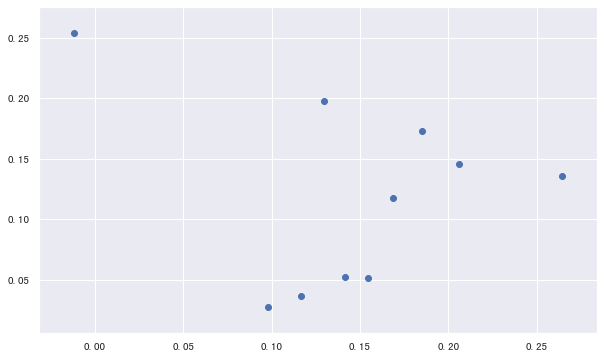

In [136]:
plt.figure(figsize=(10,6))
plt.scatter( MeanBeta_port,MeanReturn_port)

观察组合可以发现，存在负beta但是高收益率的组合，与CAPM和Black CAPM都不同。原因可能是样本剔除不干净，留下了异常值

参考因子投资原文，CAPM同样被A股数据拒绝。原文也存在低beta异象。前者的解释应该是在CAPM模型中加入风格因子，后者作为异象需要进一步探究